# Часть 1

1. Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные каунты.

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

Откроем файл и проверим данные в столбцах.

In [2]:
data = pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18945 entries, 0 to 18944
Data columns (total 42 columns):
geneID              18945 non-null object
geneSymbol          18945 non-null object
LC001-normal-RPF    18945 non-null int64
LC001-tumor-RPF     18945 non-null int64
LC001-normal-RNA    18945 non-null int64
LC001-tumor-RNA     18945 non-null int64
LC033-normal-RPF    18945 non-null int64
LC033-tumor-RPF     18945 non-null int64
LC033-normal-RNA    18945 non-null int64
LC033-tumor-RNA     18945 non-null int64
LC034-normal-RPF    18945 non-null int64
LC034-tumor-RPF     18945 non-null int64
LC034-normal-RNA    18945 non-null int64
LC034-tumor-RNA     18945 non-null int64
LC501-normal-RPF    18945 non-null int64
LC501-tumor-RPF     18945 non-null int64
LC501-normal-RNA    18945 non-null int64
LC501-tumor-RNA     18945 non-null int64
LC502-normal-RPF    18945 non-null int64
LC502-tumor-RPF     18945 non-null int64
LC502-normal-RNA    18945 non-null int64
LC502-tumor-RNA     18945 no

Столбец "LC509-tumor-RNA" имеет формат float, переведем для удобства в int. И заодно заменим NaN в нули.

In [3]:
data = data.fillna(0)
data[["LC509-tumor-RNA"]] = data[["LC509-tumor-RNA"]].astype(int)

print(data['LC509-tumor-RNA'].dtype)
print(len(data['LC509-tumor-RNA']))

int32
18945


Будем рассчитывать корреляцию Спирмена, так как мы не знаем зависимость между переменными.

In [4]:
ribo_seq_cols = [x for x in data.columns if "RPF" in x]
rna_seq_cols = [x for x in data.columns if "RNA" in x]
corrs = []
for i in range(18945):
    corrs.append(spearmanr(data.loc[i, ribo_seq_cols], data.loc[i, rna_seq_cols])[0])
len(corrs)

C:\Users\Mi\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


18945

2. Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

<AxesSubplot:ylabel='Frequency'>

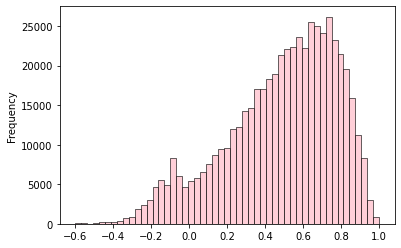

In [5]:
sns.histplot(corrs, color='pink', stat="frequency")

In [6]:
max_corr_ids = [i for i, c in enumerate(corrs) if c==1]
print('Genes with maximum correlation: ')
data.loc[max_corr_ids, 'geneSymbol']

Genes with maximum correlation: 


5495     SCGB1D2
8121      KCNA10
9754        PRG3
13158     FAM46D
13477    TMPRSS7
13578     MAGEB6
13613     TRIM60
13867      DYNAP
17480     GAGE10
17597     ZNF735
17696      IQCF3
18124     RFPL4B
Name: geneSymbol, dtype: object

In [7]:
min_corr_ids = [i for i, c in enumerate(corrs) if c==0]
print('Genes with minimal correlation: ')
data.loc[min_corr_ids, 'geneSymbol']

Genes with minimal correlation: 


2204          SUN2
3845          IFNG
7681     HNRNPA1L2
7912      PRELID3A
9529       CCDC173
11267      SLITRK5
16351        HOXC4
16675        AGAP9
18247      TAS2R20
Name: geneSymbol, dtype: object

Если корреляция высокая, то, вероятно, у этих генов нет альтернативного сплайсинга. И наоборот, если корреляция низкая, гены могут иметь альтернативные сайты, поэтому результаты RNASeq и RiboSeq будут отличаться и слабо коррелировать между собой.

3. Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2 или edgeR (для DESeq есть обёртка на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? Выводы подкрепите графиками.

Я использовала пакет edgeR в R. Соответственно, код приведён на R. [Ссылка на файл](https://github.com/rastvorova/rastvorova.github.io/blob/main/ngs/hw_Rastvorova.R).

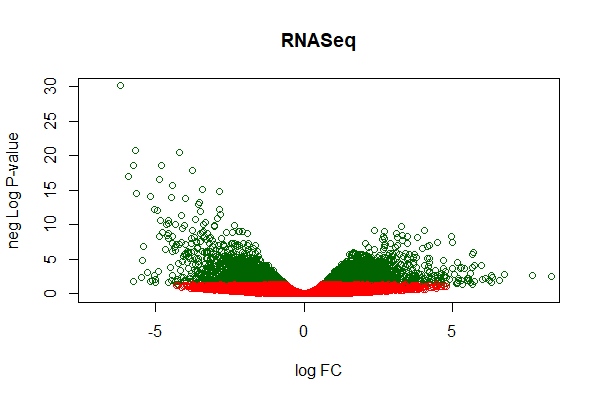

In [8]:
from IPython.display import Image
Image(filename='RNASeq.png')

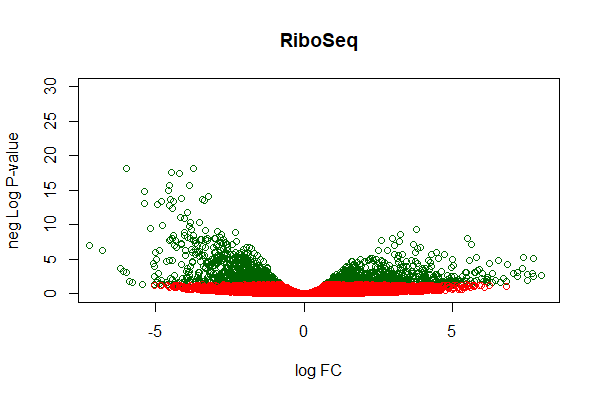

In [9]:
Image(filename='RiboSeq.png')

Графики получились разными: результаты RiboSeq имеют большее изменение величин, но более низкий уровень значимости, в сравнении с результатами RNASeq. В результатах RNASeq есть один очень хороший выброс с низким p-value и сильным изменением величины. Этот ген нам как раз был бы интересен в отношении его связи с гепатоцеллюлярной карциномой.

# Часть 2

1. Присутствует ли в покрытии генома неравномерность? Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? Присутствует ли там периодичность в три нуклеотида? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? Выводы проиллюстрируйте графиками.

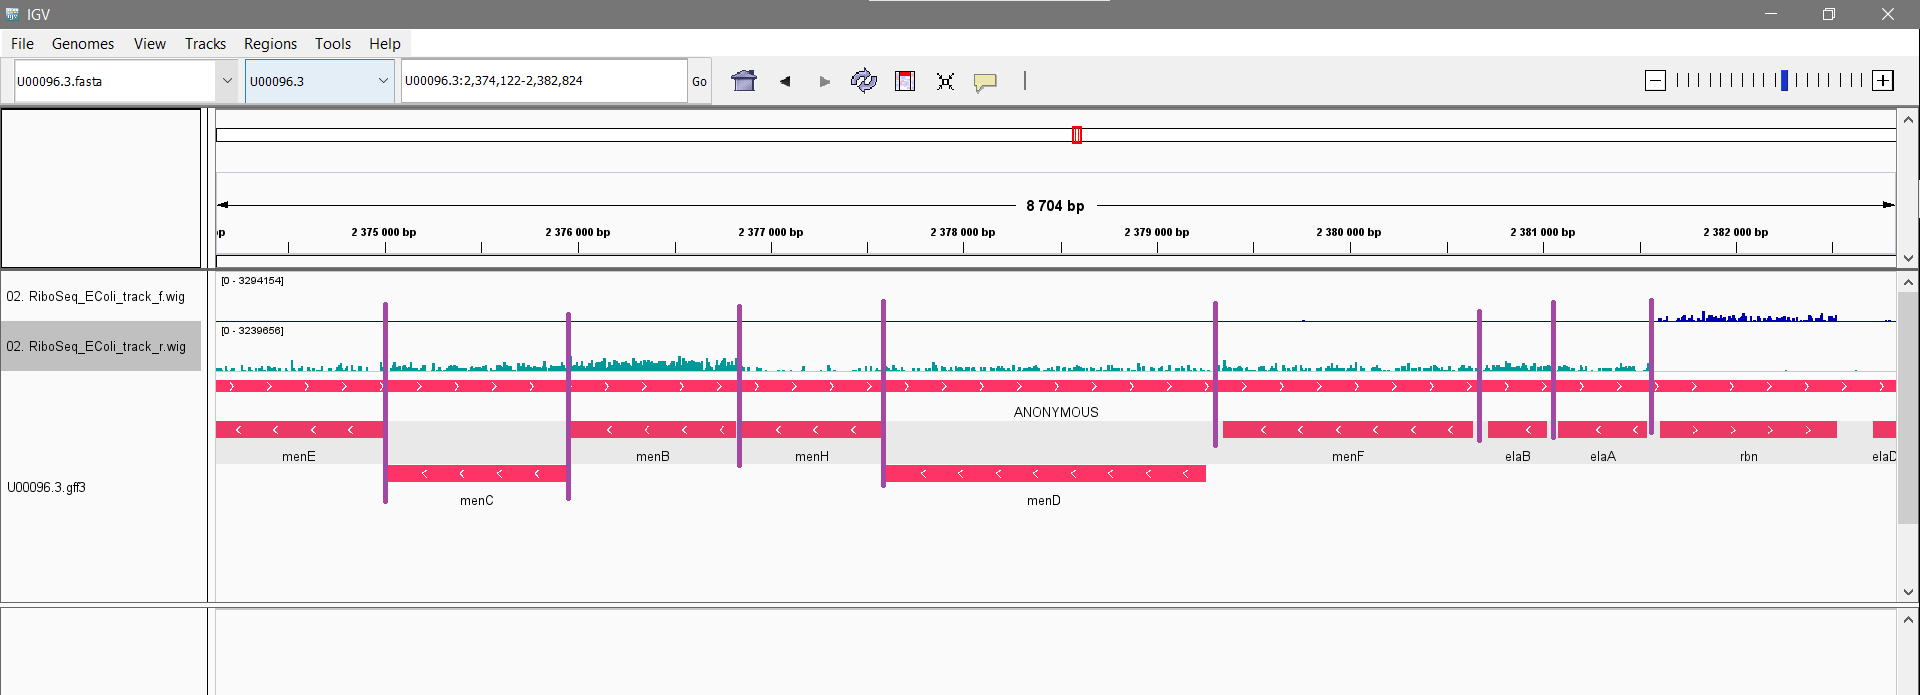

In [10]:
Image(filename='igv_2.png')

Да, геном покрыт неравномерно. Между генами это достаточно понятно и объяснимо - разные гены по-разному экспрессируются.
Неравномерность в отдельном гене (<b>menB</b>) тоже присутствует. Но переодичность в 3 нуклеотида я не вижу, хотя, вероятно, она присутствует.

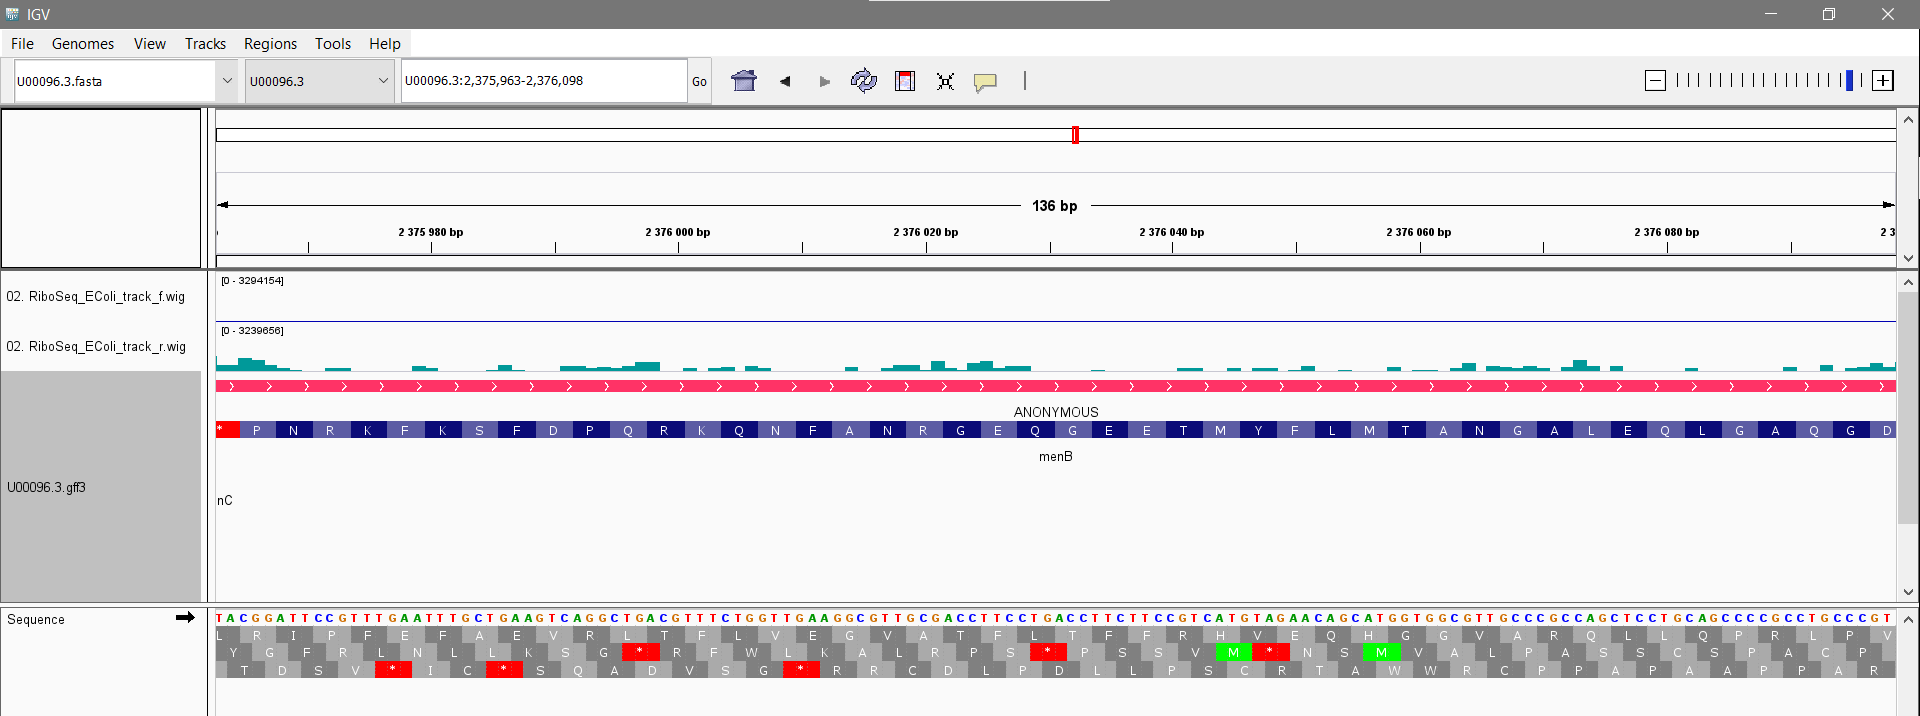

In [11]:
Image(filename='igv_menB_zoom.png')

2. Рассчитайте значения RPKM и TPM для каждого гена. В чём разница между RPKM и TPM? Для чего используется каждая метрика?

<b>RPKM</b> <i>(Reads Per Kilobase Million)</i> - количество ридов на килобазу транскрипта на миллион картированных ридов.

<b>TPM</b> <i>(Transcripts Per Million)</i> - количество транскриптов на миллион.

Эти две метрики довольно похожи, TPM можно получить из RPKM по формуле. Обе метрики используются для нормализации данных. Казалось бы, чем больше прочтений у гена (или транскрипта), тем выше его экспрессия. Но стоит учитывать, что результаты могут отличаться в разных образцах, поэтому нужно проводить нормировку на глубину секвенирования и длину гена. 

RPKM, если я правильно понимаю, не совсем универсальная величина, не всегда во всех образцах получаются схожие значения. При этом TPM больше удовлетворяет требованию инвариантности, поэтому предпочтительнее. 

In [12]:
from BCBio import GFF

gff = open("U00096.3.gff3")
annotation = list(GFF.parse(gff, limit_info={"gff_type": ["CDS"]}))[0]
gff.close()
num_of_genes = len(annotation.features)
num_of_genes

4295

Проитаем файл с аннотацией и <i>.wig</i> файлы с информацией о прочтениях.

In [13]:
wig_f = pd.read_csv('02. RiboSeq_EColi_track_f.wig')
wig_f = wig_f['variableStep chrom=U00096.3'].str.split('\t', expand=True)
wig_f.columns = ['start', 'counts']
wig_f = wig_f.astype(int)

In [14]:
wig_r = pd.read_csv('02. RiboSeq_EColi_track_r.wig')
wig_r = wig_r['variableStep chrom=U00096.3'].str.split('\t', expand=True)
wig_r.columns = ['start', 'counts']
wig_r = wig_r.astype(int)

Из файла с аннотацией получим информацию о координатах и длинах генов, коих у нас 4295.

In [15]:
gene_start = []
gene_end = []
for i in range(num_of_genes):
    gene_start.append(annotation.features[i].location.nofuzzy_start)
    gene_end.append(annotation.features[i].location.nofuzzy_end)
gene_len = [e - s for e, s in zip(gene_end, gene_start)]

Затем наиболее сложная часть: нам нужно получить количество прочтений для каждого гена. Поскольку <i>.wig</i> файлы содержат информацию о начале координат картированных ридов и их количество, нам нужно (для каждого гена) получить начало и конец, найти в <i>.wig</i> файлах координаты, попадающие в этот промежуток и сложить количество картированных ридов для каждой подошедшей координаты.

In [16]:
mapped_reads = []
i = 0
j = 0
for n in range(num_of_genes):
    reads = 0
    while wig_f.start[i] < gene_start[n]:
        i += 1
    if wig_f.start[i] >= gene_start[n]:
        while wig_f.start[i] < gene_end[n]:
            reads += wig_f.counts[i]
            i += 1
            if i >= len(wig_f.start):
                break
    while wig_r.start[j] < gene_start[n]:
        j += 1
    if wig_r.start[j] >= gene_start[n]:
        while wig_r.start[j] < gene_end[n]:
            reads += wig_r.counts[j]
            j += 1
            if j >= len(wig_r.start):
                break
    mapped_reads.append(reads)

Теперь по формуле считаем RPKM. 
$$
RPKM = {Reads\ mapped\ to\ the\ transcript \over {Total\  reads\over 10^3} * {Transcript\ length\over 10^6}} 
$$

In [17]:
total_reads = sum(wig_f['counts']) + sum(wig_r['counts'])
rpkm = [x / (y/1000 * total_reads/1000000) for x, y in zip(mapped_reads, gene_len)]
rpkm[100:120]

[61.158148994418426,
 61.32548839978911,
 11.812318075008914,
 4.805283135275735,
 96.05786479634416,
 0.4148047977890045,
 0.36003619894673333,
 0.1508723119395835,
 29.471741686667897,
 16.99527396506384,
 9.474384157406003,
 5.423497257146948,
 20.17784049563747,
 486.4225277683482,
 381.0191770909906,
 760.7949932984612,
 0.18840729245853327,
 293.2341014331524,
 60.256967478266915,
 122.96363854578586]

И, соответственно, TPM.
$$
TPM = {10^6*{RPKM \over sum(RPKM)}}
$$

In [18]:
tpm = [1000000 * x / sum(rpkm) for x in rpkm]
tpm[100:120]

[90.92740171954247,
 91.17619501341797,
 17.562065047838058,
 7.144295849392624,
 142.8148530370959,
 0.6167145851192558,
 0.535286901802644,
 0.2243107017077747,
 43.81736432152006,
 25.267869099440464,
 14.08612177592797,
 8.063430988901313,
 29.999577141340968,
 723.1928584343592,
 566.4835242375283,
 1131.118471034485,
 0.28011615540934487,
 435.968311292657,
 89.58756238351526,
 182.81724255535752]

Значения TPM получаются несколько выше.

3. Проанализируйте значения RPKM для генов из оперона ATP. Укажите геномные координаты оперона, а также то, какие гены в него входят. Есть ли разница между RPKM у различных генов, присутствующих в опероне? Как вы можете объяснить эту разницу с биологической точки зрения? Как вы думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

In [19]:
atp_ids = []
for i in range(num_of_genes):
    if 'product' not in annotation.features[i].qualifiers:
        continue
    elif 'ATP synthase' in annotation.features[i].qualifiers['product'][0]:
        atp_ids.append(i)
        print(annotation.features[i].qualifiers['product'], annotation.features[i].qualifiers['gene'])

['flagellum-specific ATP synthase FliI'] ['fliI']
['ATP synthase F1 complex subunit epsilon'] ['atpC']
['ATP synthase F1 complex subunit beta'] ['atpD']
['ATP synthase F1 complex subunit gamma'] ['atpG']
['ATP synthase F1 complex subunit alpha'] ['atpA']
['ATP synthase F1 complex subunit delta'] ['atpH']
['ATP synthase Fo complex subunit b'] ['atpF']
['ATP synthase Fo complex subunit c'] ['atpE']
['ATP synthase Fo complex subunit a'] ['atpB']
['ATP synthase accessory factor AtpI'] ['atpI']


Найдем гены, связанные с опероном АТФ-синтазы.

In [20]:
[rpkm[x] for x in atp_ids]

[0.13316622729601882,
 458.05965447197093,
 993.4018834671314,
 242.40112161961846,
 788.9667955269392,
 296.82071950762185,
 440.7393448915323,
 4851.626394743826,
 466.1097462014209,
 22.571151250189775]

In [21]:
[[gene_start[x], gene_end[x]] for x in atp_ids]

[[2016553, 2017927],
 [3915552, 3915972],
 [3915992, 3917375],
 [3917401, 3918265],
 [3918315, 3919857],
 [3919869, 3920403],
 [3920417, 3920888],
 [3920949, 3921189],
 [3921235, 3922051],
 [3922059, 3922440]]

Белок <i>flagellum-specific ATP synthase FliI</i> явно выбивается по значению RPKM и находится далеко от остальных генов, так что отбросим его. Посмотрим в IGV на остальных.
Гены оперона - это различные субъединицы АТФ-синтазы и вспомогательный фактор транскрипции (он экспрессируется меньше всего).

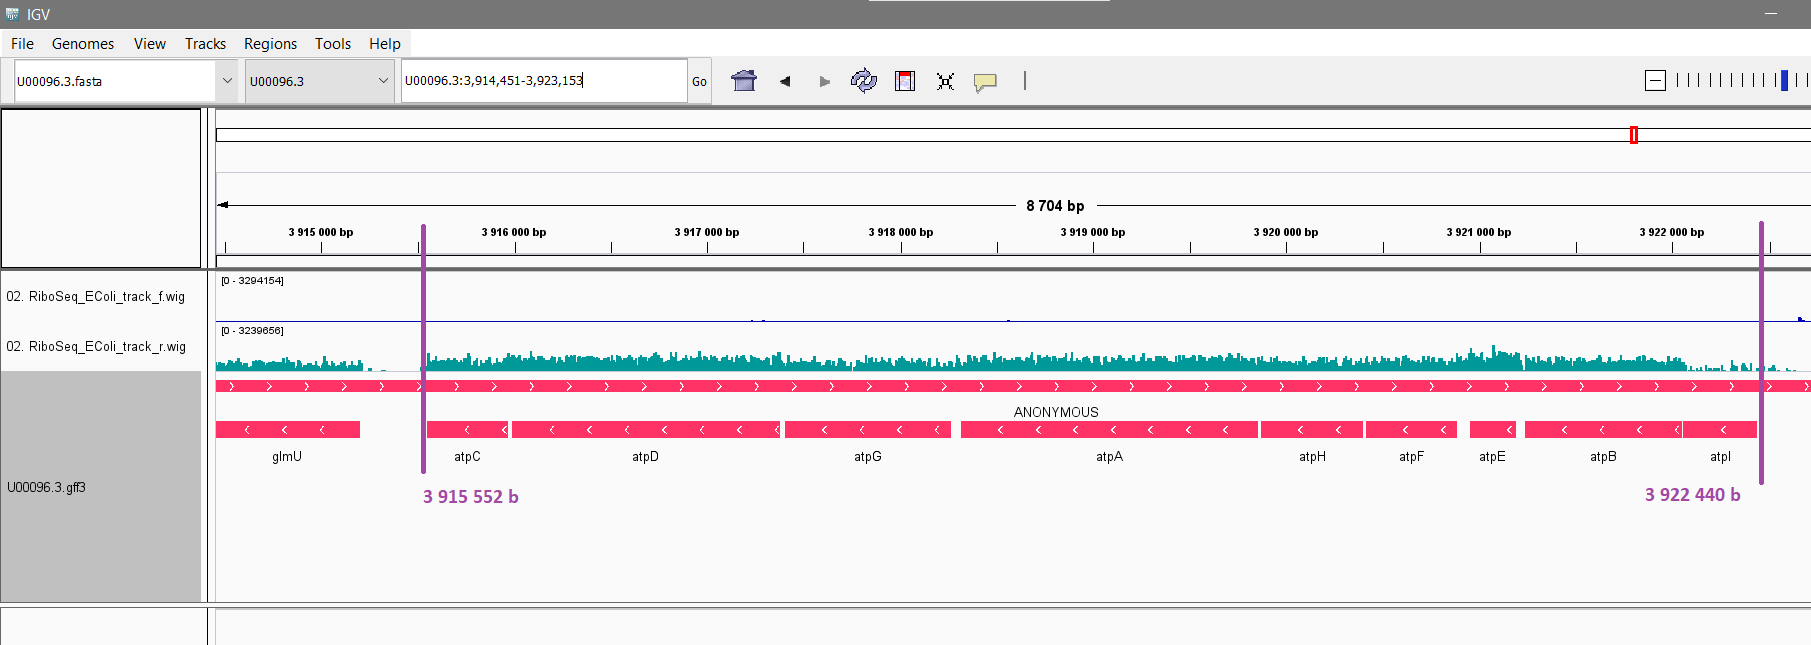

In [22]:
Image(filename='atp_operon.png')

На визуализации выделяется ген с самым высоким RPKM (atpE), что не удивительно. Вероятно, гены с более высоким RPKM экспрессировались, когда был взят образец. Соответственно, гены с меньшей экспрессией не экспрессировались в опероне.
Думаю, RPKM довольно неплохо отображает эту разницу. 

Классический RNA-Seq, скорее всего, не очень хорош для изучения оперонов, так как учитывает в том числе некодирующую РНК, и не учитывает фрагменты РНК, взаимодействующие с рибосомами, как в RiboSeq.